## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
import nltk
from nltk.corpus import stopwords

## Importing DataFrame

In [3]:
df = pd.read_csv('../data/final_data.csv')
display(df.head(),df.shape)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,emoji_count,country
0,1590841293047201797,1590841293047201797,2022-11-11 06:58:15 PST,2022-11-11,06:58:15,800,350172089,dyadav79,dyadav@gmail.com,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
1,1590809231175057409,1590809231175057409,2022-11-11 04:50:51 PST,2022-11-11,04:50:51,800,1421192870,shamitaharsh,Shamita Harsh,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
2,1590779888348573696,1590779888348573696,2022-11-11 02:54:15 PST,2022-11-11,02:54:15,800,1356150453277323264,shivam_dwivedii,Shivam Dwivedi,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
3,1590772740008517632,1590769151110705152,2022-11-11 02:25:51 PST,2022-11-11,02:25:51,800,1585136338201821184,tanzil_mansuri1,Tanzil Mansuri,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SophiaKianni', 'name': 'Soph...",NaN,NaN,NaN,NaN,0,India
4,1590746473347571719,1590746473347571719,2022-11-11 00:41:28 PST,2022-11-11,00:41:28,800,487662656,swatibhalla23,Swati Bhalla,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India


(62751, 38)

In [4]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'emoji_count', 'country'],
      dtype='object')

## Additional Data Cleaning

In [5]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

df['tokenized_text']=df['tweet'].apply(lambda x: tokenize(x.lower()))

In [6]:
new_stopwords = ['https', 't', 'co']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [7]:
def remove_stopwords(text):
    text=[word for word in text if word not in stpwrd]
    return text

df['clean']=df['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [8]:
df['clean_text'] = df['clean'].str.join(" ")
df[['clean_text']]

,clean_text
0,world talking alternate sources energy shiftin...
1,story climate conflict brought human trafficki...
2,climate change reduced date production blockad...
3,sophiakianni unicef world needs take legal ac...
4,volunteer us cleandelhi swachhbharat mycleanin...
...,...
62746,called consumers withdraw stop banking compani...
62747,today youth day cop climate change threat futu...
62748,guessing live nice part michigan crime effect...
62749,cop climate change framed battle survival nwog...


In [9]:
tweets = df[['clean_text', 'country']]
tweets

,clean_text,country
0,world talking alternate sources energy shiftin...,India
1,story climate conflict brought human trafficki...,India
2,climate change reduced date production blockad...,India
3,sophiakianni unicef world needs take legal ac...,India
4,volunteer us cleandelhi swachhbharat mycleanin...,India
...,...,...
62746,called consumers withdraw stop banking compani...,USA
62747,today youth day cop climate change threat futu...,USA
62748,guessing live nice part michigan crime effect...,USA
62749,cop climate change framed battle survival nwog...,USA


## Resampling of Dataset

In [10]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_md")

## ASEAN ENTITIES

In [ ]:
asean = ['Malaysia', 'Indonesia', 'Philippines', 'Vietnam', 'Thailand']

tweets_asean = tweets[tweets['country'].isin(asean)]
tweets_asean

In [ ]:
tweets_asean = tweets_asean.sample(frac=0.5, replace=True, random_state=1)
tweets_asean

In [ ]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_asean.clean_text.tolist())))

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

In [ ]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG' or ent.label_ == 'GPE':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_entities = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [ ]:
df_entities

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities')

## US ENTITIES

In [ ]:
us = ['USA']

tweets_us = tweets[tweets['country'].isin(us)]
tweets_us

In [ ]:
tweets_us = tweets_us.sample(frac=0.3, replace=True, random_state=1)
tweets_us

In [ ]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_us.clean_text.tolist())))

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

In [ ]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG' or ent.label_ == 'GPE' or ent.label_ == 'NORP':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_entities = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities in the US')

## Other Entities

In [ ]:
others = ['Japan', 'Iran', 'Russia', 'India']

tweets_others = tweets[tweets['country'].isin(others)]
tweets_others

In [ ]:
tweets_others = tweets_others.sample(frac=0.4, replace=True, random_state=1)
tweets_others

In [ ]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_others.clean_text.tolist())))

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

In [ ]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG' or ent.label_ == 'GPE' or ent.label_ == 'NORP':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_entities = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities in the US')

## Entities in all

In [11]:
tweets_resampled = tweets.sample(frac=0.25, replace=True, random_state=42)
tweets_resampled

,clean_text,country
56422,climate change sure anything jibbity jab,USA
15795,jersey junction adapt business model climate c...,Philippines
860,lets talk climatechange drum effective climate...,India
38158,maybe person could drastically help climate ch...,USA
62570,going degrees sunday climate change november c...,USA
...,...,...
7058,saudi arabia reached wish u best luck biggest ...,India
17206,kerem true representation think globally act l...,Philippines
11894,fact kerem joining cop huge many states taking...,Philippines
2939,bidens message climate might one world wants o...,India


In [12]:
nlp.max_length = 2500000
tokens = nlp(''.join(str(tweets_resampled.clean_text.tolist())))

In [13]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('egypt', 694),
 ('today', 513),
 ('one', 422),
 ('november', 373),
 ('un', 309),
 ('republicans', 238),
 ('first', 215),
 ('india', 209),
 ('florida', 196),
 ('pakistan', 164),
 ('democrats', 158),
 ('sharm el sheikh', 151),
 ('china', 145),
 ('zero', 137),
 ('philippines', 134),
 ('ukraine', 115),
 ('tomorrow', 112),
 ('sharm el', 111),
 ('africa', 101),
 ('cleandelhi swachhbharat mycleanindia visit', 100)]

In [14]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG' or ent.label_ == 'GPE' or ent.label_ == 'NORP':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_entities = pd.DataFrame(ent_counts, columns =['text', 'count'])

[Text(0.5, 0, 'Number of times mentioned'),
 Text(0, 0.5, 'Entities'),
 Text(0.5, 1.0, 'Most Mentioned Entities')]

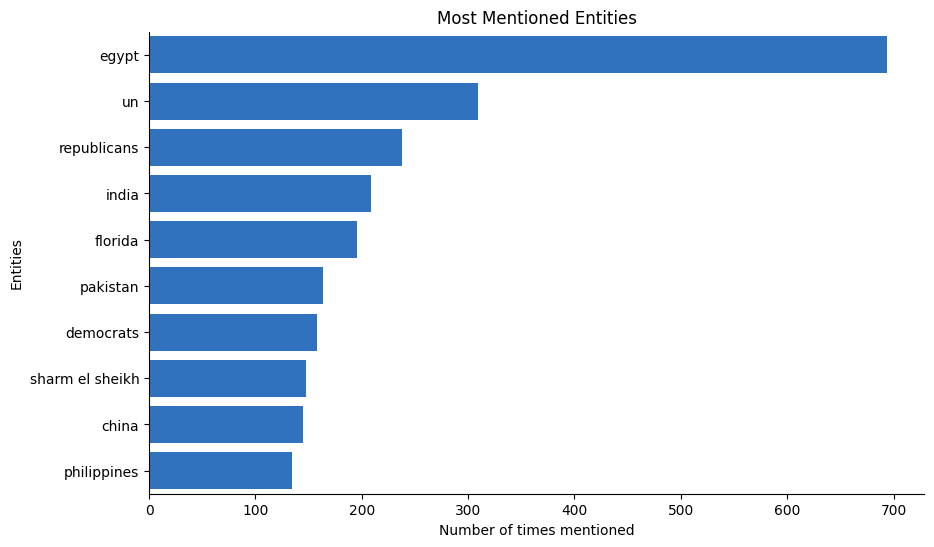

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities')